# <center> Dissertation - MSc Data Analytics   

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <center> || Book Recommendation System ||

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime


# for interactive plots
import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

import warnings
warnings.filterwarnings('ignore')

In [2]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings10k.csv')
book_tags = pd.read_csv('book_tags.csv')
tags = pd.read_csv('tags.csv')

In [3]:
ratings.shape

(230594, 3)

In [4]:
# head of the data
df = books.copy()
df.head(5)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
# columns
df.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [6]:
# Let's check the shape of the data
df.shape

(10000, 23)

There are ``10000 rows`` and ``23 columns`` in the dataframe.

In [7]:
# checking for column data types
df.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [8]:
# let's describe the numeric columns of the dataset
df.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


The complete statistics is displayed.

In [9]:
# let's also check for the categorical columns
df.describe(include='object')

,isbn,authors,original_title,title,language_code,image_url,small_image_url
count,9300,10000,9415,10000,8916,10000,10000
unique,9300,4664,9274,9964,25,6669,6669
top,439023483,Stephen King,,Selected Poems,eng,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
freq,1,60,5,4,6341,3332,3332


In [10]:
# checking for the null values
df.isnull().sum()

book_id                         0
goodreads_book_id               0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

We can observe that there are no missing values in the data frame.

In [11]:
# let's check if there are any duplicates present in the data.
df.duplicated().any()

False

In [12]:
# Get the complete information about the data using the info() function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    10000 non-null  int64  
 1   goodreads_book_id          10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

## Feature Engineering

In [13]:
# checking the unique values in "isbn13" column
df.isbn13.nunique()

9153

In [14]:
# checking the unique values in "isbn" column
df.isbn.nunique()

9300

In [15]:
df['original_publication_year'] = df['original_publication_year'].fillna(-1).apply(lambda x: int(x) if x != -1 else -1)

In [16]:
# Let's check the minimum and maximum year
#print("First year any book released ",df['original_publication_year'].min())
print("Last year any book released ",df['original_publication_year'].max())

Last year any book released  2017


This means this dataset contains books released till 2017.

In [17]:
# Let's cross check whether the new column is added to the dataset or not.
df.head(2)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


### Data Analysis and Visualisation

In [18]:
# Let's check which books were released in 2017.
df[df['original_publication_year']==2017][['title','authors','average_rating','language_code']]

,title,authors,average_rating,language_code
5883,Norse Mythology,Neil Gaiman,4.12,eng
7239,"The Dry (Aaron Falk, #1)",Jane Harper,4.07,eng
7372,A Court of Wings and Ruin (A Court of Thorns a...,Sarah J. Maas,4.54,eng
7447,"King's Cage (Red Queen, #3)",Victoria Aveyard,4.03,eng
7466,The Girl Before,J.P. Delaney,3.70,eng
7559,Caraval,Stephanie Garber,3.97,eng
8281,Faithful,Alice Hoffman,4.02,eng
8684,Behind Her Eyes,Sarah Pinborough,3.77,eng
9391,Lincoln in the Bardo,George Saunders,3.93,eng
9568,The Hate U Give,Angie Thomas,4.62,eng


In [19]:
# Now, let's check the top 15 years in which maximum books were published
df.groupby(['original_publication_year'])['title'].agg('count').sort_values(ascending= False).head(15)

original_publication_year
2012    568
2011    556
2013    518
2010    473
2014    437
2009    432
2008    383
2007    363
2006    362
2005    326
2004    307
2015    306
2003    288
2001    226
2002    225
Name: title, dtype: int64

In [20]:
# Checking the value counts for language_code column
df.language_code.value_counts()

eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
fre        25
ind        21
spa        20
ger        13
per         7
jpn         7
por         6
pol         6
en          4
nor         3
dan         3
fil         2
ita         2
vie         1
tur         1
nl          1
swe         1
rum         1
mul         1
rus         1
Name: language_code, dtype: int64

In [22]:
#merging the diferent english language code into into one
df["language_code"]= df["language_code"].replace("en-US", "eng")
df["language_code"]= df["language_code"].replace("en-GB", "eng")
df["language_code"]= df["language_code"].replace("en-CA", "eng")
df["language_code"]= df["language_code"].replace("en", "eng")

In [23]:
# after merging the data of language code
df.language_code.value_counts()

eng    8730
ara      64
fre      25
ind      21
spa      20
ger      13
jpn       7
per       7
pol       6
por       6
nor       3
dan       3
fil       2
ita       2
nl        1
rum       1
mul       1
tur       1
swe       1
vie       1
rus       1
Name: language_code, dtype: int64

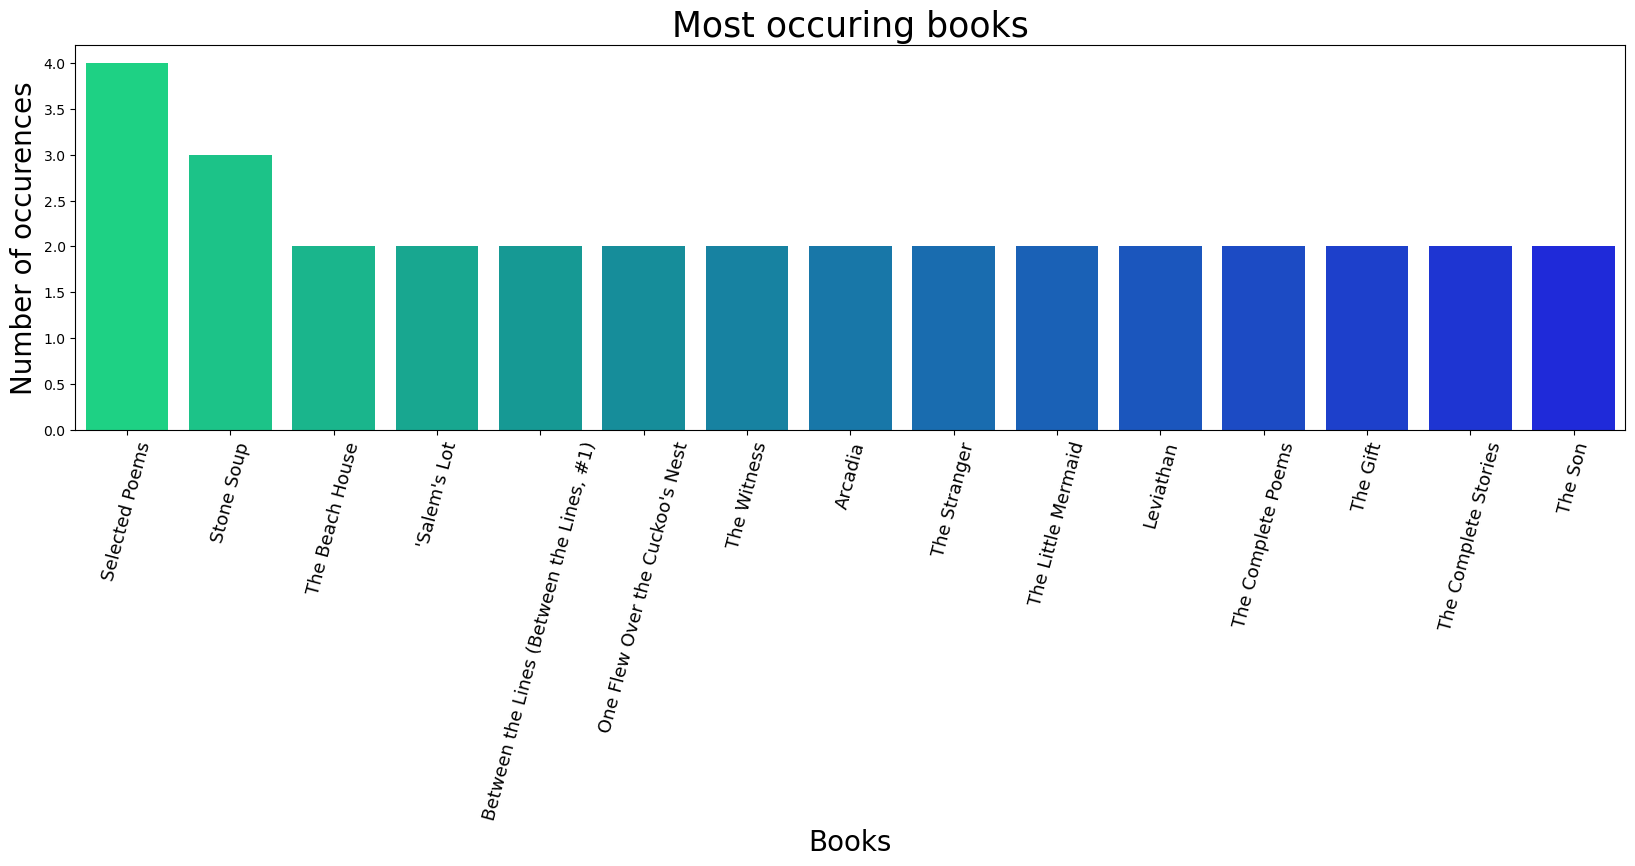

In [25]:
# Most occuring books in the data
plt.figure(figsize = (20,5))

book = df['title'].value_counts()[:15]
sns.barplot(y=book, x = book.index, palette = 'winter_r') 

plt.title("Most occuring books",fontsize = 25)
plt.xlabel("Books", fontsize = 20)
plt.ylabel("Number of occurences", fontsize = 20)
plt.xticks(rotation = 75,fontsize = 13)
plt.show()

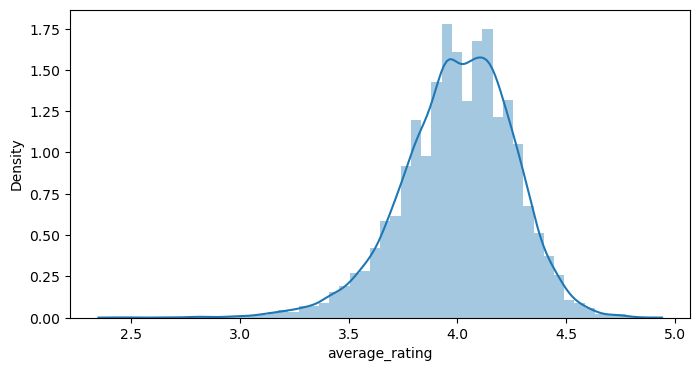

In [26]:
# distribution plot for average rating column
plt.figure(figsize = (8,4))

sns.distplot(df['average_rating'])
plt.show()

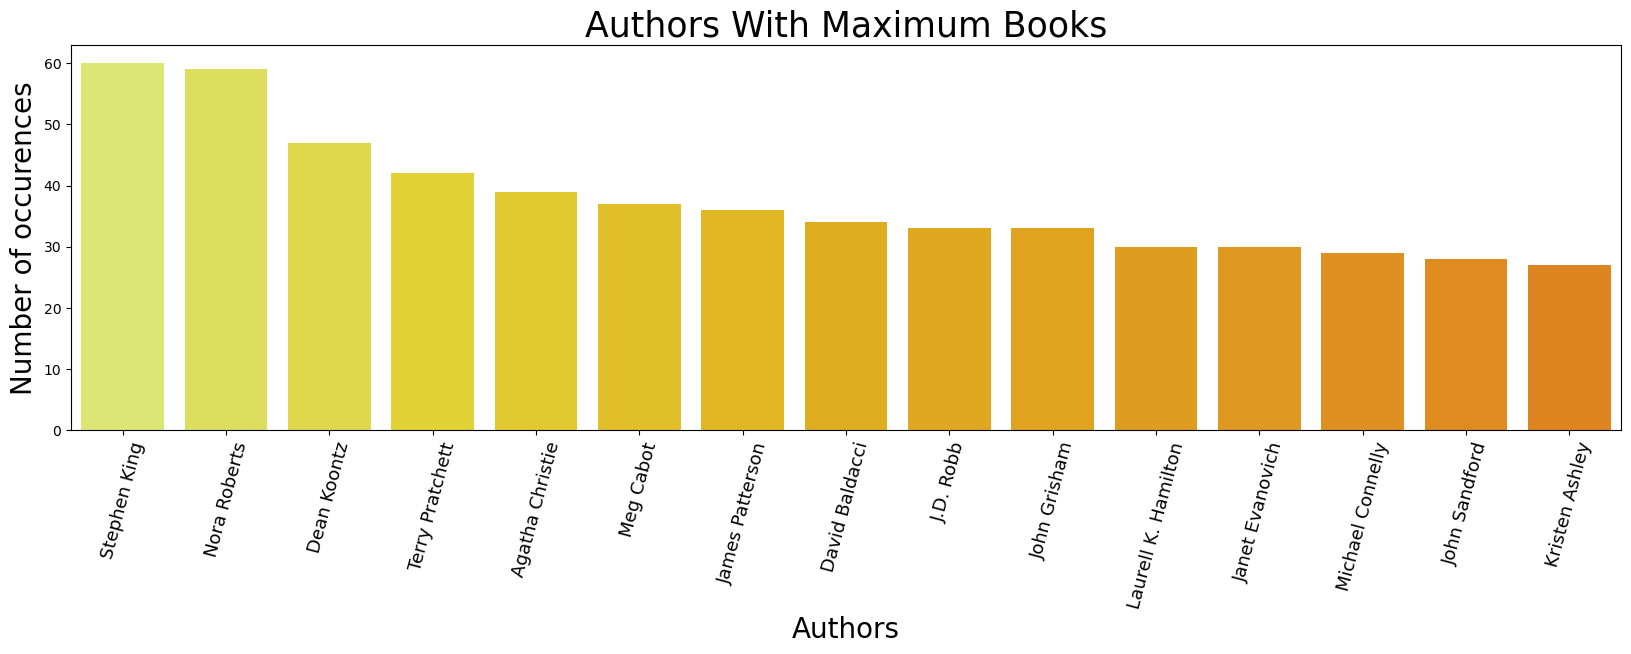

In [28]:
# authors with maximum books

plt.figure(figsize = (20,5))

publisher = df['authors'].value_counts()[:15]
sns.barplot(y=publisher, x = publisher.index, palette = 'Wistia')
plt.title("Authors With Maximum Books",fontsize = 25)
plt.xlabel("Authors", fontsize = 20)
plt.ylabel("Number of occurences", fontsize = 20)
plt.xticks(rotation = 75, fontsize  =13)
plt.show()

In [30]:
# Checking top 15 books with maximum number of ratings count
df[['title','authors','ratings_count']].sort_values(by = 'ratings_count', ascending = False).head(15).style.background_gradient(cmap = 'coolwarm')

,title,authors,ratings_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4780653
1,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","J.K. Rowling, Mary GrandPré",4602479
2,"Twilight (Twilight, #1)",Stephenie Meyer,3866839
3,To Kill a Mockingbird,Harper Lee,3198671
4,The Great Gatsby,F. Scott Fitzgerald,2683664
5,The Fault in Our Stars,John Green,2346404
6,The Hobbit,J.R.R. Tolkien,2071616
7,The Catcher in the Rye,J.D. Salinger,2044241
9,Pride and Prejudice,Jane Austen,2035490
8,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2001311


# Recommending top books to the users based on higest average ratings

In [29]:
# books with the highest average ratings
# Recommenfing top book to the user based on higest average ratings
top_books = df.sort_values('average_rating', ascending=False).head(15)
top_books = top_books[['title', 'average_rating']]
top_books

,title,average_rating
3627,The Complete Calvin and Hobbes,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.77
861,"Words of Radiance (The Stormlight Archive, #2)",4.77
8853,Mark of the Lion Trilogy,4.76
7946,ESV Study Bible,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",4.73
6919,The Indispensable Calvin and Hobbes,4.73


# Recommending Books based on Authors

In [31]:
# recommending books based on publishers
def recommend_books_on_authors(x):
    a = df[df['authors']==x][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(15)

In [32]:
# without using the dropdown menu
recommend_books_on_authors('John Grisham')

,title,average_rating
85,A Time to Kill,4.03
122,"The Firm (Penguin Readers, Level 5)",3.99
1091,Sycamore Row,3.98
226,The Client,3.97
342,The Runaway Jury,3.96
280,The Pelican Brief,3.95
595,The Rainmaker,3.91
7867,The Firm,3.89
962,The Partner,3.89
3975,The Whistler,3.87


In [33]:
# recommending books based on authors including dropdown menu
@interact
def recommend_books_on_authors(author_name = list(df['authors'].value_counts().index)):
    a = df[df['authors']==author_name][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(15)

interactive(children=(Dropdown(description='author_name', options=('Stephen King', 'Nora Roberts', 'Dean Koont…

# Recommending Books on Languages

In [34]:
# Let's recommend books based on languages including dropdown menu
@interact
def recommend_books_on_languages(language = list(df['language_code'].value_counts().index)):
    a = df[df['language_code']==language][['title','average_rating']]
    a = a.sort_values(by = 'average_rating', ascending=False)
    return a.head(15)

interactive(children=(Dropdown(description='language', options=('eng', 'ara', 'fre', 'ind', 'spa', 'ger', 'jpn…

# Recomending books based on Language code and ratings count

In [35]:
# converting average rating column into categorical column
def num_into_obj(x):
    if x>=0 and x<=1:
        return 'between 0 and 1'
    elif x>1 and x<=2:
        return 'between 1 and 2'
    elif x>2 and x<=3:
        return 'between 2 and 3'
    elif x>3 and x<=4:
        return 'between 3 and 4'
    else:
        return 'between 4 and 5'
    
df['rating_obj'] = df['average_rating'].apply(num_into_obj)

In [36]:
df['rating_obj'].value_counts()

between 4 and 5    5187
between 3 and 4    4799
between 2 and 3      14
Name: rating_obj, dtype: int64

In [37]:
# Let's encode the categorical column
rating_df = pd.get_dummies(df['rating_obj'])
rating_df.head()

,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0


In [38]:
# Let's encode the language code column as well
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ara,dan,eng,fil,fre,ger,ind,ita,jpn,mul,...,nor,per,pol,por,rum,rus,spa,swe,tur,vie
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Let's concat both the data frames and set the title column as the index 
features = pd.concat([rating_df, language_df, df['average_rating'], df['ratings_count'],df['title']], axis=1)
features.set_index('title', inplace=True)
features.head()

,between 2 and 3,between 3 and 4,between 4 and 5,ara,dan,eng,fil,fre,ger,ind,...,pol,por,rum,rus,spa,swe,tur,vie,average_rating,ratings_count
title,,,,,,,,,,,,,,,,,,,,,
"The Hunger Games (The Hunger Games, #1)",0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.34,4780653
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.44,4602479
"Twilight (Twilight, #1)",0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.57,3866839
To Kill a Mockingbird,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,4.25,3198671
The Great Gatsby,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,3.89,2683664


In [40]:
# for scaling the values of the data frame
from sklearn.preprocessing import MinMaxScaler

In [41]:
# scaling down the values of the data frame
min_max_scaler = MinMaxScaler()
features_scaled = min_max_scaler.fit_transform(features)

In [42]:
# importing neighbours
from sklearn import neighbors

In [43]:
# training the model
model = neighbors.NearestNeighbors(n_neighbors = 15, algorithm='ball_tree', metric='euclidean')
model.fit(features_scaled)
dist, idlist = model.kneighbors(features_scaled)

In [44]:
# recommending book based on language code and rating count with dropdown menu
@interact
def BookRecommender(book_name = list(df['title'].value_counts().index)):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].title)
    return book_list_name

interactive(children=(Dropdown(description='book_name', options=('Selected Poems', 'Stone Soup', 'The Beach Ho…

### Recomending books using IMDB weighted ratings formula

The next step is to determine an appropriate value for m, the minimum ratings required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more ratings than at least 95% of the books in the list.

I will use IMDB's weighted rating formula to construct my chart. Mathematically, it is represented as follows:


$Weighted \: Rating \: (WR) = \lgroup \frac{v}{v + m}. R \rgroup + \lgroup \frac{m}{v + m}. C \rgroup$

In [49]:
# v is the number of ratings for the book
# m is the minimum ratings required to be listed in the chart
# R is the average rating of the book
# C is the mean rating across the whole report


v = books['ratings_count']
m = books['ratings_count'].quantile(0.95)
R = books['average_rating']
C = books['average_rating'].mean()
W = (R*v + C*m) / (v + m)

In [50]:
books['weighted_rating'] = W

In [51]:
# sorting the books in descending order
qualified  = books.sort_values('weighted_rating', ascending=False).head(250)

In [52]:
#Top Books based on weighted rating
Top_books =  qualified[['title', 'authors', 'weighted_rating']].head(15)
Top_books

,title,authors,weighted_rating
24,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",4.555956
26,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",4.490428
17,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",4.485090
23,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",4.483227
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.424365
20,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",4.419054
30,The Help,Kathryn Stockett,4.405158
38,"A Game of Thrones (A Song of Ice and Fire, #1)",George R.R. Martin,4.398759
134,"A Storm of Swords (A Song of Ice and Fire, #3)",George R.R. Martin,4.396645
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.391147


# Cold Start Problem

In [53]:
book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [54]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [55]:
# creating a list of popular genres
genres = ["Art", "Biography", "Business", "Children's", "Classics",
          "Comics", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Graphic Novels", "History", "Horror", "Humor and Comedy", "Music", 
          "Mystery", "fiction", "Nonfiction", "Paranormal", "Philosophy", 
          "Poetry", "Psychology", "Religion", "Romance", "Science", 
          "Suspense", "Spirituality", "Sports", "Thriller", "Travel"]

In [56]:
#data cleaning
#religion (religion, religious, Spirituality)

In [57]:
genres = list(map(str.lower, genres))
genres[:4]

['art', 'biography', 'business', "children's"]

In [58]:
# extrating the available genres in our dataset from the genre list
available_genres = tags.loc[tags.tag_name.str.lower().isin(genres)]
available_genres.describe()

,tag_id
count,27.000000
mean,18229.962963
std,9089.045120
min,2938.000000
25%,9363.500000
50%,20939.000000
75%,25892.500000
max,31155.000000


In [59]:
# selecting books that has genres present in available genre our based on tag id
available_genres_books = book_tags[book_tags.tag_id.isin(available_genres.tag_id)]
print('There are {} books that are tagged with above genres'.format(available_genres_books.shape[0]))

There are 53828 books that are tagged with above genres


In [60]:
available_genres_books.head()

,goodreads_book_id,tag_id,count
1,1,11305,37174
5,1,11743,9954
25,1,7457,958
38,1,22973,673
52,1,20939,465


In [61]:
# adding genre column
available_genres_books['genre'] = available_genres.tag_name.loc[available_genres_books.tag_id].values
available_genres_books.drop_duplicates(subset='goodreads_book_id', keep='first', inplace=True)
available_genres_books.head()

,goodreads_book_id,tag_id,count,genre
1,1,11305,37174,fantasy
102,2,11305,3441,fantasy
202,3,11305,47478,fantasy
301,5,11305,39330,fantasy
400,6,11305,38378,fantasy


In [62]:
# creating a copy of books data set
mixed_genre = books.copy()

In [63]:
# appending genre coloumn to books data set
mixed_genre = mixed_genre.merge(available_genres_books[['goodreads_book_id','genre']], on = ['goodreads_book_id'], how = 'left')
mixed_genre

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,weighted_rating,genre
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,4.328370,fiction
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,4.424365,fantasy
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,3.588247,fantasy
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,4.237463,classics
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,3.896700,classics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,4.010241,fantasy
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,4.019225,biography
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,4.020407,fiction
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,3.980333,nonfiction


In [64]:
# droping books that is not present in our avalaible genre
mixed_genre.dropna(subset='genre', inplace=True)
mixed_genre

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,weighted_rating,genre
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,4.328370,fiction
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,4.424365,fantasy
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,3.588247,fantasy
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,4.237463,classics
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,3.896700,classics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,4.010241,fantasy
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,4.019225,biography
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...,4.020407,fiction
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...,3.980333,nonfiction


In [65]:
# create a function get the weighted ratings of all books
def build_chart(genre, percentile=0.85):
    df = available_genres_books[available_genres_books['genre'] == genre.lower()]
    
    qualified = mixed_genre.set_index('goodreads_book_id').loc[df.goodreads_book_id]

    v = qualified['ratings_count']
    m = qualified['ratings_count'].quantile(percentile)
    R = qualified['average_rating']
    C = qualified['average_rating'].mean()
    qualified['weighted_rating'] = (R*v + C*m) / (v + m)

    qualified.sort_values('weighted_rating', ascending=False, inplace=True)
    return qualified

In [66]:
# creating a list of required the cols
cols = ['title','authors','original_publication_year','average_rating','ratings_count','weighted_rating','genre']

In [67]:
# checking the output based on genre art
genre = 'art'
build_chart(genre)[cols].head()

,title,authors,original_publication_year,average_rating,ratings_count,weighted_rating,genre
goodreads_book_id,,,,,,,
9677870,Press Here,"Hervé Tullet, Christopher Franceschelli",2010.0,4.44,15315,4.067442,art
825377,The Dot,Peter H. Reynolds,2003.0,4.26,17436,4.029998,art
203805,Vincent Van Gogh: The Complete Paintings,"Rainer Metzger, Ingo F. Walther",1988.0,4.14,24000,4.010219,art
342637,Dali: The Paintings,"Robert Descharnes, Gilles Néret",1994.0,4.17,14600,3.997160,art
47559,"Amphigorey (Amphigorey, #1)",Edward Gorey,1972.0,4.08,28815,3.995319,art


In [68]:
# creating a dataframe in a sorted manner
df1 = mixed_genre.groupby(["genre"])
df2 = df1.apply(lambda x: x.sort_values(["weighted_rating"]))
df3 = df2.reset_index(drop=True)
df3.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,weighted_rating,genre
0,406,627206,627206,1763052,64,874774241,9.780875e+12,Betty Edwards,1979.0,Drawing on the Right Side of the Brain,...,591,16846,16544,44024,56358,90678,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,3.911121,art
1,580,222078,222078,215065,102,071483355X,9.780715e+12,E.H. Gombrich,1950.0,The Story of Art,...,470,12639,13426,32492,39357,68539,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,3.917572,art
2,524,114683,114683,110426,15,1844137872,9.781844e+12,Banksy,1988.0,Wall and Piece,...,687,11641,11724,27885,38313,60554,https://images.gr-assets.com/books/1327904853m...,https://images.gr-assets.com/books/1327904853s...,3.921748,art


In [69]:
# creating a dataframe for top genres
df4 = mixed_genre.groupby('genre')['weighted_rating'].max().reset_index().sort_values(["weighted_rating"], ascending = [False])

In [70]:
# displaying the top genres
df4 = df4.reset_index(drop = True)
df4

,genre,weighted_rating
0,fantasy,4.555956
1,fiction,4.405158
2,classics,4.306214
3,history,4.296984
4,science,4.278676
5,comics,4.250567
6,poetry,4.248682
7,horror,4.245494
8,romance,4.238748
9,religion,4.231663


In [71]:
# extracting top 3 book from top 5 genres
final_df = pd.DataFrame()
for i in range(5):
    genre = df4['genre'].iloc[i]
    df5 = build_chart(genre)[cols].head(3)
    final_df = pd.concat([final_df, df5], ignore_index=True)

In [72]:
final_df = final_df.drop(columns=["authors", "original_publication_year", "ratings_count", "weighted_rating"], axis=1)

In [73]:
# proposed system for cold start problem 
final_df

,title,average_rating,genre
0,Harry Potter and the Deathly Hallows (Harry Po...,4.61,fantasy
1,Harry Potter and the Half-Blood Prince (Harry ...,4.54,fantasy
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.53,fantasy
3,"Harry Potter Boxset (Harry Potter, #1-7)",4.74,fiction
4,The Help,4.45,fiction
5,"A Game of Thrones (A Song of Ice and Fire, #1)",4.45,fiction
6,The Giving Tree,4.38,classics
7,To Kill a Mockingbird,4.25,classics
8,Night (The Night Trilogy #1),4.30,classics
9,"Unbroken: A World War II Story of Survival, Re...",4.40,history


In [75]:
ratings

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
230589,5651,2822,4
230590,5737,2724,5
230591,3904,10,5
230592,3904,1791,3


In [76]:
# merging rating dataset with genre 
ratings = ratings.merge(mixed_genre[['book_id','genre', 'title']], on = ['book_id'], how = 'left')
ratings

,user_id,book_id,rating,genre,title
0,1,258,5,fiction,The Shadow of the Wind (The Cemetery of Forgot...
1,2,4081,4,fiction,I am Charlotte Simmons
2,2,260,5,nonfiction,How to Win Friends and Influence People
3,2,9296,5,psychology,The Drama of the Gifted Child: The Search for ...
4,2,2318,3,business,The Millionaire Next Door: The Surprising Secr...
...,...,...,...,...,...
230589,5651,2822,4,fiction,"The Templar Legacy (Cotton Malone, #1)"
230590,5737,2724,5,history,Hiroshima
230591,3904,10,5,classics,Pride and Prejudice
230592,3904,1791,3,romance,"Austenland (Austenland, #1)"


# Comparing the simple recommender and our proposed solution with 5 random user

# User 15

In [79]:
# seen books of user 15
user_15 = ratings[ratings['user_id']==15].sort_values(["rating"], ascending = [False])
user_15

,user_id,book_id,rating,genre,title
184,15,8,5,classics,The Catcher in the Rye
237,15,688,5,nonfiction,Under the Banner of Heaven: A Story of Violent...
212,15,306,5,fiction,She's Come Undone
213,15,337,5,fiction,The Ultimate Hitchhiker's Guide to the Galaxy
216,15,119,5,fiction,The Handmaid's Tale
...,...,...,...,...,...
242,15,8842,3,poetry,The Realm of Possibility
215,15,887,3,classics,As I Lay Dying
188,15,4,3,classics,To Kill a Mockingbird
207,15,361,3,classics,Oliver Twist


In [80]:
user_15 = user_15.dropna()

In [81]:
user15_common_books_in_proposed = user_15.merge(final_df[['genre','title']], on = ['genre','title'], how = 'inner')
user15_common_books_in_proposed

,user_id,book_id,rating,genre,title
0,15,87,5,classics,Night (The Night Trilogy #1)
1,15,18,4,fantasy,Harry Potter and the Prisoner of Azkaban (Harr...
2,15,27,4,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
3,15,4,3,classics,To Kill a Mockingbird


In [82]:
user15_common_books_in_top15 = user_15.merge(top_books[['title']], on = ['title'], how = 'inner')
user15_common_books_in_top15

,user_id,book_id,rating,genre,title


# For User 40

In [83]:
# seen books of user 40
user_40 = ratings[ratings['user_id']==40].sort_values(["rating"], ascending = [False])
user_40

,user_id,book_id,rating,genre,title
490,40,4,5,classics,To Kill a Mockingbird
144173,40,212,5,romance,Atonement
1342,40,2,5,fantasy,Harry Potter and the Sorcerer's Stone (Harry P...
8968,40,857,5,mystery,The Westing Game
1354,40,66,5,classics,Gone with the Wind
489,40,10,5,classics,Pride and Prejudice
482,40,179,5,biography,"Angela's Ashes (Frank McCourt, #1)"
1349,40,115,5,fiction,Middlesex
493,40,483,5,fiction,Franny and Zooey
1346,40,18,4,fantasy,Harry Potter and the Prisoner of Azkaban (Harr...


In [84]:
user_40 = user_40.dropna()

In [85]:
user40_common_books_in_proposed = user_40.merge(final_df[['genre','title']], on = ['genre','title'], how = 'inner')
user40_common_books_in_proposed

,user_id,book_id,rating,genre,title
0,40,4,5,classics,To Kill a Mockingbird
1,40,18,4,fantasy,Harry Potter and the Prisoner of Azkaban (Harr...
2,40,27,4,fantasy,Harry Potter and the Half-Blood Prince (Harry ...
3,40,25,3,fantasy,Harry Potter and the Deathly Hallows (Harry Po...


In [86]:
user40_common_books_in_top15 = user_40.merge(top_books[['title']], on = ['title'], how = 'inner')
user40_common_books_in_top15

,user_id,book_id,rating,genre,title


# For User 510

In [87]:
# seen books of user 510
user_510 = ratings[ratings['user_id']==510].sort_values(["rating"], ascending = [False])
user_510

,user_id,book_id,rating,genre,title
26840,510,323,5,fiction,The Unbearable Lightness of Being
25712,510,233,5,fiction,Love in the Time of Cholera
172240,510,763,5,fiction,The Bluest Eye
172239,510,1135,5,classics,Dubliners
101740,510,1084,5,classics,To the Lighthouse
29271,510,8696,5,fiction,Glengarry Glen Ross
27585,510,959,5,classics,A Portrait of the Artist as a Young Man
29268,510,213,4,classics,The Metamorphosis
172241,510,354,4,fiction,Beloved
101741,510,701,4,classics,Mrs. Dalloway


In [88]:
user_510 = user_510.dropna()

In [89]:
user510_common_books_in_proposed = user_510.merge(final_df[['genre','title']], on = ['genre','title'], how = 'inner')
user510_common_books_in_proposed

,user_id,book_id,rating,genre,title
0,510,4,4,classics,To Kill a Mockingbird


In [90]:
user510_common_books_in_top15 = user_510.merge(top_books[['title']], on = ['title'], how = 'inner')
user510_common_books_in_top15

,user_id,book_id,rating,genre,title


# For User 1000

In [91]:
# seen books of user 1000 
user_1000 = ratings[ratings['user_id'] == 1000].sort_values(["rating"], ascending = [False])
user_1000

,user_id,book_id,rating,genre,title
26139,1000,289,5,classics,"Watership Down (Watership Down, #1)"
26143,1000,9962,5,nonfiction,Cunt: A Declaration of Independence
26079,1000,753,5,comics,"Scott Pilgrim, Volume 1: Scott Pilgrim's Preci..."
26080,1000,2110,5,comics,"Scott Pilgrim, Volume 2: Scott Pilgrim vs. The..."
25570,1000,6704,5,fiction,Stone Butch Blues
...,...,...,...,...,...
26130,1000,3274,2,classics,Hop On Pop
25544,1000,2155,1,thriller,From a Buick 8
25566,1000,29,1,classics,Romeo and Juliet
25552,1000,7887,1,horror,Storm of the Century: An Original Screenplay


In [92]:
user_1000 = user_1000.dropna()

In [93]:
user1000_common_books_in_proposed = user_1000.merge(final_df[['genre','title']], on = ['genre','title'], how = 'inner')
user1000_common_books_in_proposed

,user_id,book_id,rating,genre,title


In [94]:
user1000_common_books_in_top15 = user_1000.merge(top_books[['title']], on = ['title'], how = 'inner')
user1000_common_books_in_top15

,user_id,book_id,rating,genre,title


# For User 1800

In [95]:
# seen books of user 1800
user_1800 = ratings[ratings['user_id']==1800].sort_values(["rating"], ascending = [False])
user_1800

,user_id,book_id,rating,genre,title
158757,1800,301,5,classics,Heart of Darkness
158624,1800,142,5,fiction,The Pillars of the Earth (The Kingsbridge Seri...
158644,1800,225,5,classics,East of Eden
158966,1800,233,5,fiction,Love in the Time of Cholera
158641,1800,485,5,classics,The Brothers Karamazov
...,...,...,...,...,...
158844,1800,5007,2,mystery,"Predator (Kay Scarpetta, #14)"
158847,1800,5282,2,mystery,"Book of the Dead (Kay Scarpetta, #15)"
158825,1800,986,2,horror,The Girl Who Loved Tom Gordon
196509,1800,3937,2,horror,Blaze


In [96]:
user_1800 = user_1800.dropna()

In [97]:
user1800_common_books_in_proposed = user_1800.merge(final_df[['genre','title']], on = ['genre','title'], how = 'inner')
user1800_common_books_in_proposed

,user_id,book_id,rating,genre,title
0,1800,4,4,classics,To Kill a Mockingbird
1,1800,25,4,fantasy,Harry Potter and the Deathly Hallows (Harry Po...


In [98]:
user1800_common_books_in_top15 = user_1800.merge(top_books[['title']], on = ['title'], how = 'inner')
user1800_common_books_in_top15

,user_id,book_id,rating,genre,title
0,1800,3753,4,fantasy,"Harry Potter Collection (Harry Potter, #1-6)"


In [99]:
# percentage of 5 users for our proposed system
100*sum([4/77, 4/42, 1/32, 0/107, 2/163])/5

3.814121716729079

In [100]:
# percentage of 5 users for simple recommendation system
100*sum([0/77, 0/42, 0/32, 0/107, 1/163])/5

0.12269938650306748

# User-Based Collaborative Filtering 

In [101]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from wordcloud import WordCloud

In [102]:
# utility
from collections import Counter
from itertools import chain
import warnings
from IPython.display import clear_output
warnings.filterwarnings("ignore")

In [103]:
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings10k.csv')

In [104]:
print(books.shape)
print(ratings.shape)

(10000, 23)
(230594, 3)


In [105]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [106]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [107]:
# Number of users
print('The ratings dataset has', ratings['user_id'].nunique(), 'unique users')

# Number of books
print('The ratings dataset has', ratings['book_id'].nunique(), 'unique books')

# Number of ratings
print('The ratings dataset has', ratings['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(ratings['rating'].unique()))

The ratings dataset has 3788 unique users
The ratings dataset has 5743 unique books
The ratings dataset has 5 unique ratings
The unique ratings are [1, 2, 3, 4, 5]


In [108]:
books.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [109]:
# Remove columns as index base
books.drop(books.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22]], axis=1, inplace=True)

In [110]:
# checking the columns are dropped or not
books

,book_id,title,average_rating,ratings_count
0,1,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
2,3,"Twilight (Twilight, #1)",3.57,3866839
3,4,To Kill a Mockingbird,4.25,3198671
4,5,The Great Gatsby,3.89,2683664
...,...,...,...,...
9995,9996,"Bayou Moon (The Edge, #2)",4.09,17204
9996,9997,"Means of Ascent (The Years of Lyndon Johnson, #2)",4.25,12582
9997,9998,The Mauritius Command,4.35,9421
9998,9999,Cinderella Ate My Daughter: Dispatches from th...,3.65,11279


In [111]:
# Merge ratings and books datasets
df = pd.merge(ratings, books, on = 'book_id', how = 'inner')

# Take a look at the data
df.head()

,user_id,book_id,rating,title,average_rating,ratings_count
0,1,258,5,The Shadow of the Wind (The Cemetery of Forgot...,4.24,263685
1,11,258,3,The Shadow of the Wind (The Cemetery of Forgot...,4.24,263685
2,143,258,4,The Shadow of the Wind (The Cemetery of Forgot...,4.24,263685
3,242,258,5,The Shadow of the Wind (The Cemetery of Forgot...,4.24,263685
4,325,258,4,The Shadow of the Wind (The Cemetery of Forgot...,4.24,263685


In [112]:
df.shape

(230594, 6)

In [113]:
# Keep the books with over 10K ratings count
df = df[df['ratings_count']>10000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226852 entries, 0 to 230593
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         226852 non-null  int64  
 1   book_id         226852 non-null  int64  
 2   rating          226852 non-null  int64  
 3   title           226852 non-null  object 
 4   average_rating  226852 non-null  float64
 5   ratings_count   226852 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 12.1+ MB


In [114]:
df.shape

(226852, 6)

In [115]:
# Check popular books
df.sort_values(by='ratings_count', ascending=False).head()

,user_id,book_id,rating,title,average_rating,ratings_count
230519,2886,1,5,"The Hunger Games (The Hunger Games, #1)",4.34,4780653
8184,3916,2,5,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
8192,3944,2,5,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
8191,3845,2,5,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479
8190,3892,2,5,Harry Potter and the Sorcerer's Stone (Harry P...,4.44,4602479


In [116]:
# Number of users
print('The merge dataset has', df['user_id'].nunique(), 'unique users')

# Number of books
print('The merge dataset has', df['book_id'].nunique(), 'unique books')

# Number of titles
print('The merge dataset has', df['title'].nunique(), 'unique title')

# Number of ratings
print('The merge dataset has', df['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The merge ratings are', sorted(df['rating'].unique()))

The merge dataset has 3788 unique users
The merge dataset has 5370 unique books
The merge dataset has 5356 unique title
The merge dataset has 5 unique ratings
The merge ratings are [1, 2, 3, 4, 5]


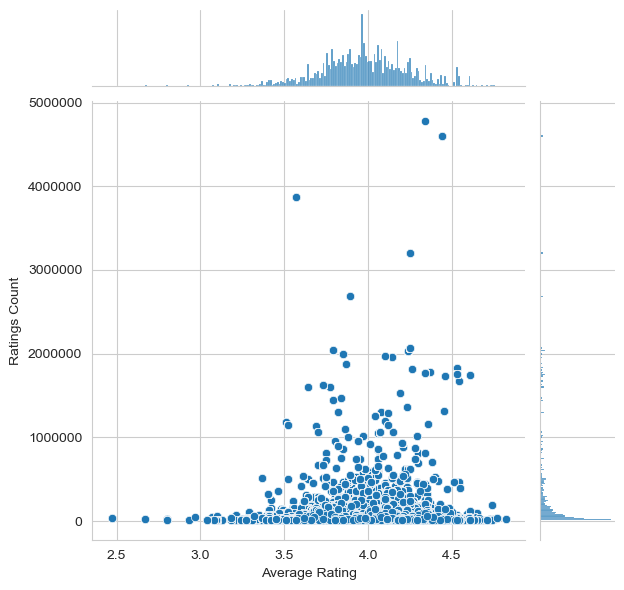

In [117]:
# plot of average ratings vs ratings count
ax = sns.jointplot(x = 'average_rating', y = 'ratings_count', data = df)
plt.ticklabel_format(style='plain', axis='y')
ax.set_axis_labels('Average Rating', 'Ratings Count')
plt.show()

# Step 4: Create User-Item Matrix

# In step 4, we will transform the dataset into a matrix format. The rows of the matrix are users, and the columns of the matrix are books. The value of the matrix is the user rating of the book if there is a rating. Otherwise, it shows 'NaN'.

In [120]:
# Create user-item matrix
matrix = df.pivot_table(index='user_id', columns='title', values='rating')
matrix.head()

title,"Angels (Walsh Family, #3)",'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,100 Selected Poems,"13 Little Blue Envelopes (Little Blue Envelope, #1)",1421: The Year China Discovered America,1491: New Revelations of the Americas Before Columbus,...,"ttyl (Internet Girls, #1)","xxxHolic, Vol. 1 (xxxHOLiC, #1)",أولاد حارتنا,الرحيق المختوم,ذاكرة الجسد,رجال في الشمس,عابر سرير,فوضى الحواس,لا تحزن,واحة الغروب
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 5: Data Normalization

# Since some people tend to give a higher rating than others, we normalize the rating by extracting the average rating of each user.

# After normalization, the books with a rating less than the user's average rating get a negative value, and the books with a rating more than the user's average rating get a positive value.

In [121]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis = 1), axis = 'rows') # Mean normalization
matrix_norm.head()

title,"Angels (Walsh Family, #3)",'Salem's Lot,"'Tis (Frank McCourt, #2)","1,000 Places to See Before You Die","100 Bullets, Vol. 1: First Shot, Last Call",100 Love Sonnets,100 Selected Poems,"13 Little Blue Envelopes (Little Blue Envelope, #1)",1421: The Year China Discovered America,1491: New Revelations of the Americas Before Columbus,...,"ttyl (Internet Girls, #1)","xxxHolic, Vol. 1 (xxxHOLiC, #1)",أولاد حارتنا,الرحيق المختوم,ذاكرة الجسد,رجال في الشمس,عابر سرير,فوضى الحواس,لا تحزن,واحة الغروب
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 6: Identify Similar Users

# We will calculate the user similarity matrix using Pearson correlation.

In [122]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity

user_id,1,2,3,4,6,7,8,9,10,11,...,5748,5749,5751,5757,5758,5760,5766,5895,6840,7582
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.620174,0.515580,NaN,0.904534,-0.272166,0.066157,0.210526,-0.383065,...,NaN,0.341882,NaN,0.944911,-5.000000e-01,-0.217195,-0.547723,NaN,NaN,NaN
2,NaN,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.620174,NaN,1.000000,0.076932,NaN,-0.461538,0.327327,-0.093522,0.522233,NaN,...,NaN,0.645497,NaN,NaN,NaN,0.102062,NaN,NaN,0.342997,NaN
4,0.515580,1.0,0.076932,1.000000,NaN,0.094304,0.205291,-0.097116,0.407699,0.047565,...,0.449013,0.660939,NaN,1.000000,-6.549210e-01,0.466126,0.000000,NaN,-0.179695,0.333333
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5760,-0.217195,NaN,0.102062,0.466126,NaN,NaN,0.032275,-0.219265,-0.609499,NaN,...,0.189389,0.838870,0.57735,NaN,NaN,1.000000,-0.316228,NaN,0.211289,1.000000
5766,-0.547723,NaN,NaN,0.000000,NaN,-0.496079,-0.270833,0.608164,0.645497,0.866025,...,NaN,-0.589768,NaN,NaN,-1.000000e+00,-0.316228,1.000000,NaN,-1.000000,NaN
5895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Now let's use user ID 1 as an example to illustrate how to find similar users.

# We first need to exclude user ID 1 from the similar user list and decide the number of similar users.

In [123]:
# Pick a user ID
picked_userid = 1

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()

user_id,1,2,3,4,6,7,8,9,10,11,...,5748,5749,5751,5757,5758,5760,5766,5895,6840,7582
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.620174,NaN,1.000000,0.076932,NaN,-0.461538,0.327327,-0.093522,0.522233,NaN,...,NaN,0.645497,NaN,NaN,NaN,0.102062,NaN,NaN,0.342997,NaN
4,0.515580,1.0,0.076932,1.000000,NaN,0.094304,0.205291,-0.097116,0.407699,0.047565,...,0.449013,0.660939,NaN,1.0,-0.654921,0.466126,0.000000,NaN,-0.179695,0.333333
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.904534,NaN,-0.461538,0.094304,NaN,1.000000,0.840168,0.233723,-0.353553,-0.866025,...,NaN,1.000000,NaN,NaN,0.944911,NaN,-0.496079,NaN,0.322749,NaN


# In the user similarity matrix, the values range from -1 to 1, where -1 means opposite book preference and 1 means same book preference.

# n = 10 means we would like to pick the top 10 most similar users for user ID 1.

# The user-based collaborative filtering makes recommendations based on users with similar tastes, so we need to set a positive threshold. Here we set the user_similarity_threshold to be 0.3, meaning that a user must have a Pearson correlation coefficient of at least 0.3 to be considered as a similar user.

# After setting the number of similar users and similarity threshold, we sort the user similarity value from the highest and lowest, then print out the most similar users' ID and the Pearson correlation value.

In [124]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)

The similar users for user 1 are user_id
1287    1.0
1429    1.0
1285    1.0
2583    1.0
4045    1.0
4037    1.0
1298    1.0
1311    1.0
4007    1.0
1328    1.0
Name: 1, dtype: float64


# In step 7, we will narrow down the item pool by doing the following:

# Remove the books that have been watched by the target user (user ID 1 in this example).
# Keep only the books that similar users have watched.

In [125]:
# Books that the target user has seen
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched

title,1984,A Year in Provence,"Antigone (The Theban Plays, #3)",Balzac and the Little Chinese Seamstress,Cry to Heaven,Divine Secrets of the Ya-Ya Sisterhood,"Ender's Game (Ender's Saga, #1)","Gilead (Gilead, #1)",Girl with a Pearl Earring,Gone with the Wind,...,The Kite Runner,The Memory Keeper's Daughter,The Red Tent,The Scarlet Letter,The Sea,The Secret Life of Bees,"The Shadow of the Wind (The Cemetery of Forgotten Books, #1)",The Stone Diaries,To Kill a Mockingbird,West with the Night
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.422222,0.422222,1.422222,-0.577778,0.422222,1.422222,1.422222,1.422222,-0.577778,0.422222,...,1.422222,-0.577778,-0.577778,-1.577778,-0.577778,-0.577778,1.422222,-0.577778,1.422222,0.422222


# To keep only the similar users' books, we keep the user IDs in the top 10 similar user lists and remove the books with all missing values. All missing value for a books means that none of the similar users have read the books.

In [126]:
# Books that similar users rated. Remove books that none of the similar users have read or rated
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_books

title,'Salem's Lot,1984,"2nd Chance (Women's Murder Club, #2)","A Child Called ""It"" (Dave Pelzer #1)",A Connecticut Yankee in King Arthur's Court,A Cook's Tour: Global Adventures in Extreme Cuisines,"A Crown of Swords (Wheel of Time, #7)",A Cry In The Night,"A Darkness At Sethanon (The Riftwar Saga, #4)","A Dirty Job (Grim Reaper, #1)",...,"Wicked: The Life and Times of the Wicked Witch of the West (The Wicked Years, #1)","Wideacre (The Wideacre Trilogy, #1)","Winnie-the-Pooh (Winnie-the-Pooh, #1)","Winter's Heart (Wheel of Time, #9)","Without Remorse (Jack Ryan Universe, #1)","Wizard and Glass (The Dark Tower, #4)",Wolverine: Origin,"Wolves of the Calla (The Dark Tower, #5)",Wuthering Heights,You Belong To Me
user_id,,,,,,,,,,,,,,,,,,,,,
1285,NaN,NaN,-1.235294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1287,NaN,NaN,NaN,0.884615,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.72973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,NaN,NaN,NaN,NaN,NaN,1.59322,-0.40678,NaN,-0.40678,NaN,...,-1.40678,NaN,NaN,-1.40678,NaN,NaN,NaN,NaN,NaN,NaN
1328,-1.921053,NaN,NaN,NaN,1.078947,NaN,NaN,NaN,NaN,0.078947,...,NaN,NaN,0.078947,NaN,NaN,0.078947,NaN,0.078947,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.039474,NaN,0.039474,NaN
4037,0.926606,-1.073394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.926606,NaN,NaN,NaN,NaN,NaN


# Next, we will drop the books that user ID 1 already read from the similar user book list.

In [127]:
# Remove the already read books from the book list
similar_user_books.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_books

title,'Salem's Lot,"2nd Chance (Women's Murder Club, #2)","A Child Called ""It"" (Dave Pelzer #1)",A Connecticut Yankee in King Arthur's Court,A Cook's Tour: Global Adventures in Extreme Cuisines,"A Crown of Swords (Wheel of Time, #7)",A Cry In The Night,"A Darkness At Sethanon (The Riftwar Saga, #4)","A Dirty Job (Grim Reaper, #1)",A Million Little Pieces,...,"Wicked: The Life and Times of the Wicked Witch of the West (The Wicked Years, #1)","Wideacre (The Wideacre Trilogy, #1)","Winnie-the-Pooh (Winnie-the-Pooh, #1)","Winter's Heart (Wheel of Time, #9)","Without Remorse (Jack Ryan Universe, #1)","Wizard and Glass (The Dark Tower, #4)",Wolverine: Origin,"Wolves of the Calla (The Dark Tower, #5)",Wuthering Heights,You Belong To Me
user_id,,,,,,,,,,,,,,,,,,,,,
1285,NaN,-1.235294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1287,NaN,NaN,0.884615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.72973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1311,NaN,NaN,NaN,NaN,1.59322,-0.40678,NaN,-0.40678,NaN,NaN,...,-1.40678,NaN,NaN,-1.40678,NaN,NaN,NaN,NaN,NaN,NaN
1328,-1.921053,NaN,NaN,1.078947,NaN,NaN,NaN,NaN,0.078947,NaN,...,NaN,NaN,0.078947,NaN,NaN,0.078947,NaN,0.078947,NaN,NaN
1429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.039474,NaN,0.039474,NaN
4037,0.926606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.926606,NaN,NaN,NaN,NaN,NaN


# Step 8: Recommend Books to the target user

In [128]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_books.columns:
  # Get the ratings for book i
  book_rating = similar_user_books[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the book has rating
    if pd.isna(book_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the book rating
      score = similar_users[u] * book_rating[u]
      # Add the score to the total score for the book so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['title', 'weighted_average_score'])
    
# Sort the books by score
ranked_item_score = item_score.sort_values(by='weighted_average_score', ascending=False)

# Select top m books
m = 10
ranked_item_score.head(m)

,title,weighted_average_score
400,The Very Hungry Caterpillar Board Book,1.884615
138,Ishmael:A Novel,1.764706
167,Man's Search for Meaning,1.764706
392,The Stranger Beside Me: Ted Bundy The Shocking...,1.764706
338,The Hitchhiker's Guide to the Galaxy (Hitchhik...,1.764706
313,"The Devil in the White City: Murder, Magic, an...",1.764706
203,Our Man in Havana,1.600000
328,The Giving Tree,1.600000
263,"Summer Knight (The Dresden Files, #4)",1.593220
323,"The Fires of Heaven (Wheel of Time, #5)",1.593220
